# GETTING STARTED

In [2]:
# Importing libraries
import warnings
from sklearn.model_selection import train_test_split
from pmdarima.metrics import smape
from pmdarima.arima import auto_arima
import pmdarima as pm
from statsmodels.tsa.seasonal import seasonal_decompose
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm
from statsmodels.tsa.stattools import acf


import matplotlib.pyplot as plt


warnings.filterwarnings("ignore")

In [3]:
# Loading data
df_sales = pd.read_csv('df_financial.csv', parse_dates=[0], usecols=[0,1], index_col='Date')

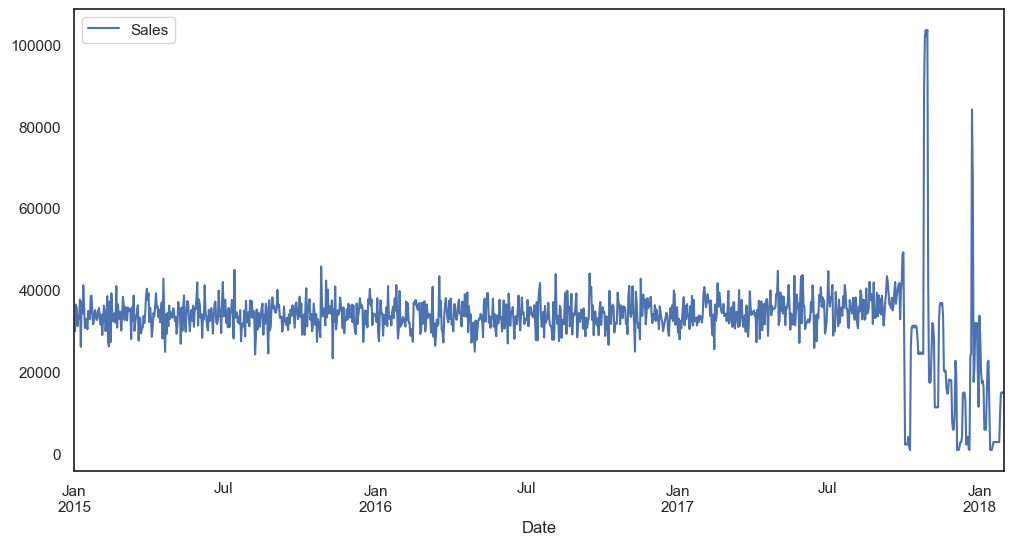

In [4]:
# Graphing Time Series data
df_sales.plot(figsize=(12,6))
plt.ticklabel_format(axis='y', style='plain');

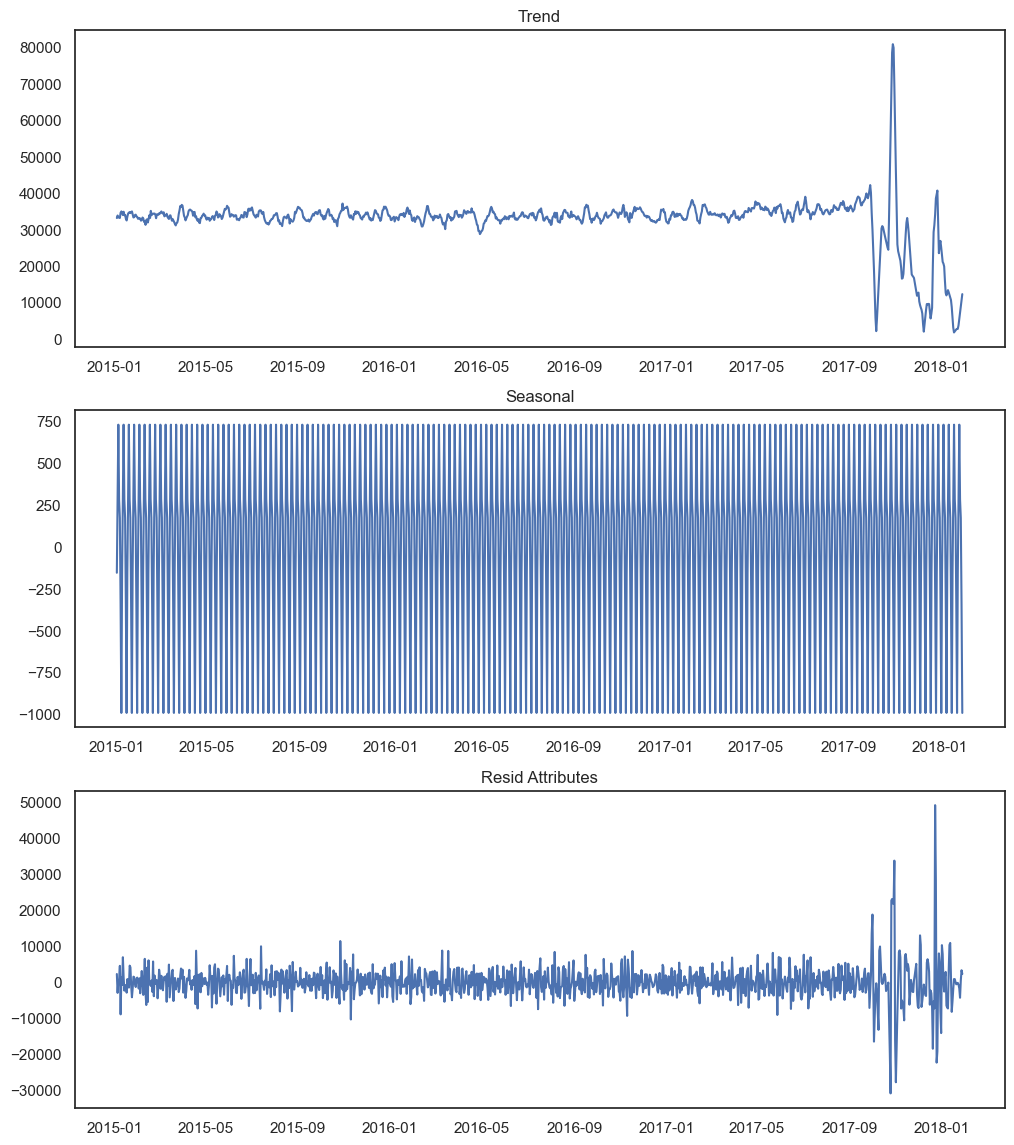

In [128]:
# Decomposing Times Series by Tren, Seasonal & Resid Attributes
season_analysis = seasonal_decompose(df_sales.Sales)


plt.figure(figsize=(12,14))

plt.subplot(3,1,1)
plt.plot(season_analysis.trend)
plt.ticklabel_format(axis='y', style='plain')
plt.title('Trend')

plt.subplot(3,1,2)
plt.plot(season_analysis.seasonal)
plt.title('Seasonal')

plt.subplot(3,1,3)
plt.plot(season_analysis.resid)
plt.title('Resid Attributes');

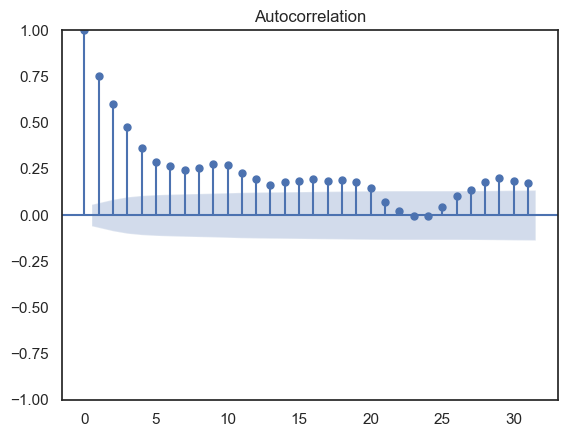

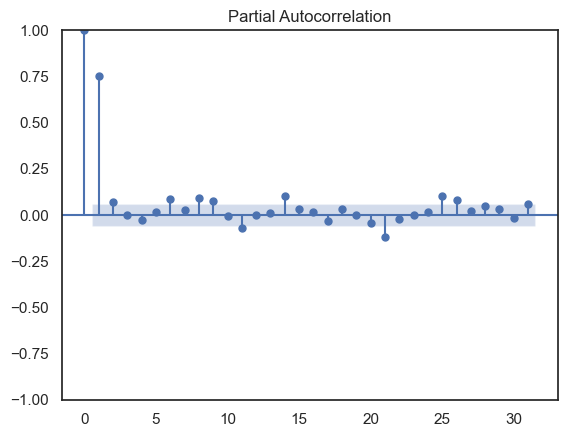

In [101]:
# Graphing Autocorrelation & Partial Autororrelation of Times Series
pm.plot_acf(df_sales, alpha=0.05)
pm.plot_pacf(df_sales, alpha=0.05);

# SARIMA MODEL

## Building SARIMA Model

In [102]:
# Auto Arima will helps on finding the best model with the least AIC
auto_arima_model = pm.auto_arima(
    df_sales, error_action='ignore', suppress_warnings=True, maxiter=20, seasonal=True, m=7)

# Sarima model (1,1,5)X(1,0,0,7) Summary
auto_arima_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                 1127
Model:             SARIMAX(1, 1, 5)x(1, 0, [], 7)   Log Likelihood              -11334.578
Date:                            Mon, 21 Nov 2022   AIC                          22685.155
Time:                                    16:22:02   BIC                          22725.367
Sample:                                01-01-2015   HQIC                         22700.350
                                     - 01-31-2018                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3866      0.070      5.496      0.000       0.249       0.524
ma.L1         -0.7070      0.074     -9.504      0.000      -0.853      -0.561
ma.L2         -0.0189      0.026     -0.712      0.477      -0.071       0.033
ma.L3         -0.0526      0.032     -1.648      0.099      -0.115       0.010
ma.L4         -0.0842      0.030     -2.794      0.005      -0.143      -0.025
ma.L5         -0.0774      0.030     -2.620      0.009      -0.135      -0.019
ar.S.L7       -0.0579      0.027     -2.181      0.029      -0.110      -0.006
sigma2      3.386e+07   2.11e-09   1.61e+16      0.000    3.39e+07    3.39e+07
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):             42811.03
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               3.82   Skew:                             1.75
Prob(H) (two-sided):                  0.00   Kurtosis:                        33.01
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 5.48e+31. Standard errors may be unstable.
"""

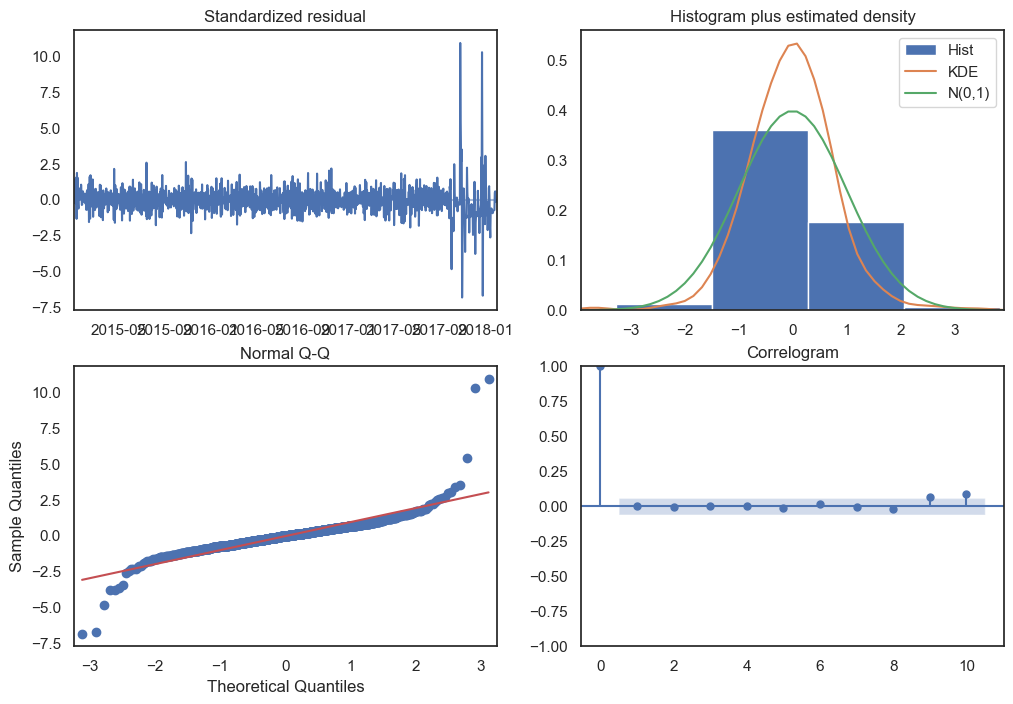

In [99]:
# Residual plots
auto_arima_model.plot_diagnostics(figsize=(12,8));

In [103]:
# A function for SARIMA model
def sarima_func(time_series, p,d,q, P,D,Q,m):
    
    sarima_model = sm.tsa.statespace.SARIMAX(time_series, order=(p,d,q), seasonal_order= (P,D,Q,m))
    sarima_model_fit = sarima_model.fit()
    sarima_predict = sarima_model_fit.predict()

# SARIMA Model (1,1,5)X(1,0,0,7)
sarima_func(df_sales, 1,1,1, 1,0,0,7)

##  Graphing Actual Time Series vs Predicting Model

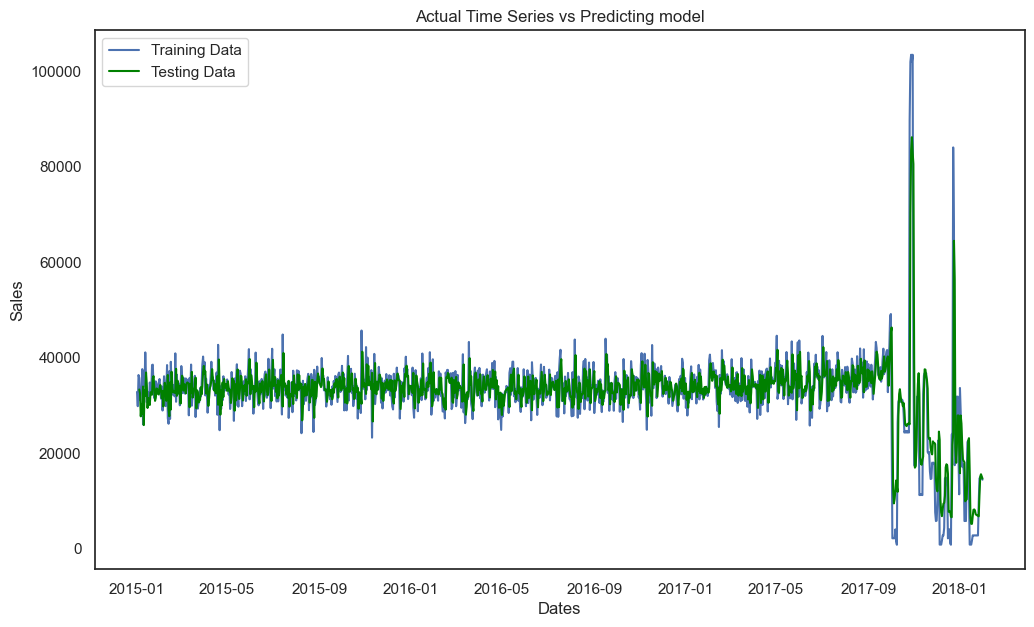

In [107]:
# Graphing actual Time Series vs Predicting output
plt.figure(figsize=(12, 7))
plt.plot(df_sales, label='Training Data')
plt.plot(sarima_predict[3:], 'green', label='Testing Data')
plt.title('Actual Time Series vs Predicting model')
plt.xlabel('Dates')
plt.ylabel('Sales')
plt.legend();

## Accuracy Metrics

In [108]:
# A function for acurracy metrics
def accuracy_metrics(actual, predict):
    mape = np.mean(np.abs(predict - actual)/np.abs(actual))
    rmse = np.sqrt(mean_squared_error(actual, predict))
    mae = np.mean(np.abs(predict - actual))
    mse = mean_squared_error(actual, predict)
    r2 = r2_score(actual, predict)\
    
    print("Test MAPE: %.3f" % mape)
    print("Test RMSE: %.3f" % rmse)
    print("Test MAE: %.3f" % mae)
    print("Test MSE: %.3f" % mse)
    print("Test R2: %.3f" % r2)
    
accuracy_metrics(df_sales.Sales[1:], sarima_predict[1:])

Test MAPE: 0.272
Test RMSE: 5691.343
Test MAE: 3678.458
Test MSE: 32391390.528
Test R2: 0.584


#  SARIMA TRAIN MODEL

## Building Arima Training Model (1, 1, 5)x(1, 0, 0, 7)

In [111]:
# Splitting the data into train and test

train, test = train_test_split(df_sales, train_size=0.7, shuffle=False)

In [112]:
# Build model
train_model = sm.tsa.statespace.SARIMAX(train,
                                        order=(1, 1, 5),
                                        seasonal_order=(1, 0, 0, 7))

train_model_fit = train_model.fit()

print(train_model_fit.summary())

                                     SARIMAX Results                                      
Dep. Variable:                              Sales   No. Observations:                  788
Model:             SARIMAX(1, 1, 5)x(1, 0, [], 7)   Log Likelihood               -7514.353
Date:                            Mon, 21 Nov 2022   AIC                          15044.706
Time:                                    17:21:03   BIC                          15082.052
Sample:                                01-01-2015   HQIC                         15059.064
                                     - 02-26-2017                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9059      1.118     -0.810      0.418      -3.098       1.286
ma.L1         -0.0496      1.119   

In [113]:
#Forecast len(test) steps ahead
train_forecast = train_model_fit.get_forecast(steps=len(test))

#Confidence Intervals of the forecasted values
train_forecast_conf_int = train_forecast.conf_int(alpha=0.05)

# Make as pandas series
train_forecast_pm = train_forecast.predicted_mean
lower_series = train_forecast_conf_int.iloc[:,0]
upper_series = train_forecast_conf_int.iloc[:,1]

## Graphing Training vs Testing vs Forecasting Series

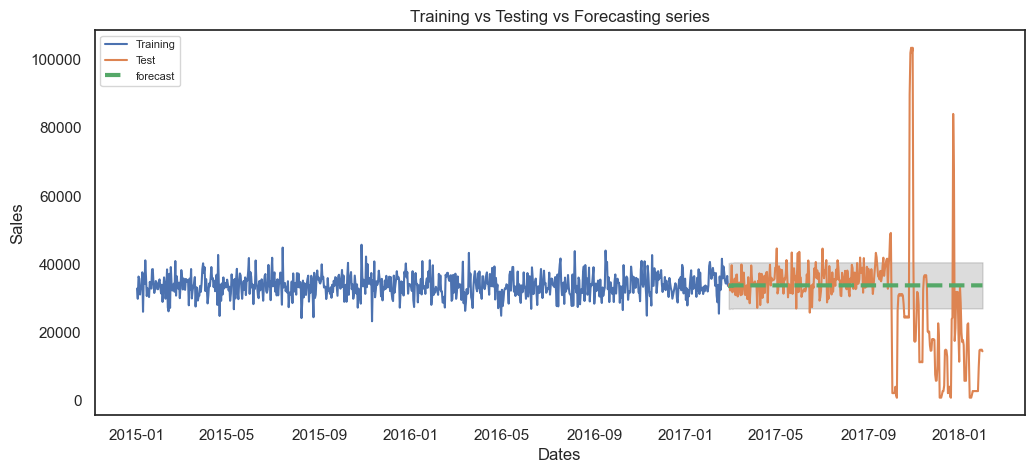

In [114]:
# Plot
plt.figure(figsize=(12, 5), dpi=100)
plt.plot(train, label='Training')
plt.plot(test, label='Test')
plt.plot(train_forecast_pm, linestyle='dashed', label='forecast', linewidth=3)
plt.fill_between(train_forecast_conf_int.index, lower_series, upper_series,
                 color='k', alpha=.15)
plt.title('Training vs Testing vs Forecasting series')
plt.xlabel('Dates')
plt.ylabel('Sales')
plt.legend(loc='upper left', fontsize=8);

## Accuracy Metrics

In [115]:
# Accuracy metrics
accuracy_metrics(test.Sales, train_forecast_pm)

Test MAPE: 2.226
Test RMSE: 15406.939
Test MAE: 9420.610
Test MSE: 237373778.153
Test R2: -0.061


# FORECASTING

## Building Forecasting Model

In [117]:
# Forecast n_periods steps ahead + Confidence Intervals of the forecasted values
n_periods = len(test)

forecast, conf_int = auto_arima_model.predict(n_periods=n_periods, return_conf_int=True)

In [118]:
# Make series for graphing Confidence Intervals
lower_series = pd.Series(conf_int[:, 0], index=forecast.index)
upper_series = pd.Series(conf_int[:, 1], index=forecast.index)

## Graphing Time Series + Forecast + Confidence Intervals

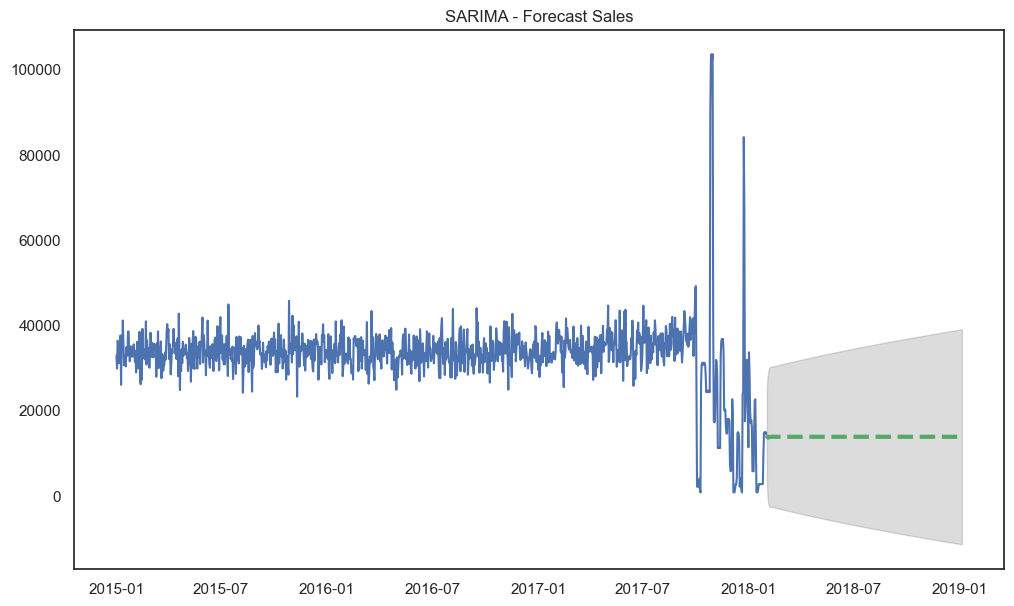

In [126]:
# Graphing Time Series + Forecast + Confidence Intervals
plt.figure(figsize=(12,7))
plt.plot(df_sales)
plt.plot(forecast, color='g', linestyle='dashed', linewidth=3)
plt.fill_between(forecast.index, 
                 lower_series, 
                 upper_series, 
                 color='k', alpha=.15)

plt.title("SARIMA - Forecast Sales");